# Covid 19 prediction

The acceleration and precision of COVID-19 diagnosis are critical in mitigating the impact of the pandemic on healthcare systems. To address this, predictive models leveraging various parameters have been developed to assess the likelihood of SARS-CoV-2 infection. These models, based on a dataset downloaded from the 'ABC' government website, comprise information from 278,848 individuals who underwent the RT-PCR test. The dataset encompasses 11 columns, featuring 8 key parameters suspected to play a pivotal role in predicting COVID-19 outcomes. The binary outcome variable indicates whether the test result is positive or negative for COVID-19. The temporal range of the data spans from 11th March 2020 to 30th April 2020. The dataset is partitioned into training and validation sets, considering data from 11th March to 15th April, with a subsequent split ratio of 4:1. The test set comprises data from 16th April to 30th April. This approach aims to facilitate the training and evaluation of predictive models, assisting medical professionals worldwide in optimizing patient care amid the ongoing healthcare resource constraints.


1.Please perform all appropriate feature engineering tasks. 

2.Perform important data visualization techniques to find the pattern in data.

3.Report characteristics of important features, such as total number and percentage of each category in a table format after performing all relevant tasks.

4.Perform multiple machine learning models relevant to your hypothesis, justify your model.

5.Perform important cost functions to justify which model is better. 



The following list describes each of the dataset’s features used by the model: 
A. Basic information: 

1. ID (Individual ID)

2. Sex (male/female). 

3. Age ≥60 above years (true/false) 

4. Test date (date when tested for COVID)


B. Symptoms: 

5. Cough (true/false).

6. Fever (true/false). 

7. Sore throat (true/false). 

8. Shortness of breath (true/false). 

9. Headache (true/false). 

# Index 
### 1 - Data cleaning 
### 1 - DATA VISUALIZATION
### 1 - Applying label encoding
### 1 - Feature Selection chi-square Test¶
### 1 - Model training
### 1 - Cross validation¶
### 1 - Xg_boost
### 1 - App model 
### 1 - Sql query 

## Data cleaning and visualization

In [4]:
#import lib 
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [4]:
#load_dataset
df=pd.read_csv(r"C:\Users\star\Desktop\corona_tested_006.csv")
df.head()

C:\Users\star\AppData\Local\Temp\ipykernel_19036\1694790893.py:2: DtypeWarning: Columns (2,3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(r"C:\Users\star\Desktop\corona_tested_006.csv")


,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
1,2,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
2,3,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,4,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
4,5,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278848 non-null  int64 
 1   Test_date            278848 non-null  object
 2   Cough_symptoms       278848 non-null  object
 3   Fever                278848 non-null  object
 4   Sore_throat          278848 non-null  object
 5   Shortness_of_breath  278848 non-null  object
 6   Headache             278848 non-null  object
 7   Corona               278848 non-null  object
 8   Age_60_above         278848 non-null  object
 9   Sex                  278848 non-null  object
 10  Known_contact        278848 non-null  object
dtypes: int64(1), object(10)
memory usage: 23.4+ MB


In [6]:
df.isnull().sum()

Ind_ID                 0
Test_date              0
Cough_symptoms         0
Fever                  0
Sore_throat            0
Shortness_of_breath    0
Headache               0
Corona                 0
Age_60_above           0
Sex                    0
Known_contact          0
dtype: int64

In [9]:
#check the all unique values table
for i in df:
  print(i, ":", df[i].unique())

Ind_ID : [     1      2      3 ... 278846 278847 278848]
Test_date : ['11-03-2020' '12-03-2020' '13-03-2020' '14-03-2020' '15-03-2020'
 '16-03-2020' '17-03-2020' '18-03-2020' '19-03-2020' '20-03-2020'
 '21-03-2020' '22-03-2020' '23-03-2020' '24-03-2020' '25-03-2020'
 '26-03-2020' '27-03-2020' '28-03-2020' '29-03-2020' '30-03-2020'
 '31-03-2020' '01-04-2020' '02-04-2020' '03-04-2020' '04-04-2020'
 '05-04-2020' '06-04-2020' '07-04-2020' '08-04-2020' '09-04-2020'
 '10-04-2020' '11-04-2020' '12-04-2020' '13-04-2020' '14-04-2020'
 '15-04-2020' '16-04-2020' '17-04-2020' '18-04-2020' '19-04-2020'
 '20-04-2020' '21-04-2020' '22-04-2020' '23-04-2020' '24-04-2020'
 '25-04-2020' '26-04-2020' '27-04-2020' '28-04-2020' '29-04-2020'
 '30-04-2020']
Cough_symptoms : ['TRUE' 'FALSE' 'None' False True]
Fever : ['FALSE' 'TRUE' 'None' False True]
Sore_throat : ['TRUE' 'FALSE' 'None' False True]
Shortness_of_breath : ['FALSE' 'TRUE' 'None' False True]
Headache : ['FALSE' 'TRUE' 'None' False True]
Corona : 

In [10]:
#convert True and False in right format
df['Cough_symptoms']=df['Cough_symptoms'].apply(lambda x: 'FALSE' if x==False else x)
df['Cough_symptoms']=df['Cough_symptoms'].apply(lambda x: 'TRUE' if x==True else x)
df['Fever']=df['Fever'].apply(lambda x: 'FALSE' if x==False else x)
df['Fever']=df['Fever'].apply(lambda x: 'TRUE' if x==True else x)
df['Sore_throat']=df['Sore_throat'].apply(lambda x: 'FALSE' if x==False else x)
df['Sore_throat']=df['Sore_throat'].apply(lambda x: 'TRUE' if x==True else x)
df['Shortness_of_breath']=df['Shortness_of_breath'].apply(lambda x: 'FALSE' if x==False else x)
df['Shortness_of_breath']=df['Shortness_of_breath'].apply(lambda x: 'TRUE' if x==True else x)
df['Headache']=df['Headache'].apply(lambda x: 'FALSE' if x==False else x)
df['Headache']=df['Headache'].apply(lambda x: 'TRUE' if x==True else x)

In [11]:
#replacing the value to None to null 
df['Cough_symptoms'].replace('None', pd.NA, inplace=True)
df['Fever'].replace('None', pd.NA, inplace=True)
df['Sore_throat'].replace('None', pd.NA, inplace=True)
df['Shortness_of_breath'].replace('None', pd.NA, inplace=True)
df['Headache'].replace('None', pd.NA, inplace=True)
df['Corona'].replace('other', pd.NA, inplace=True)
df['Sex'].replace('None', pd.NA, inplace=True)

In [12]:
df.isnull().sum()

Ind_ID                     0
Test_date                  0
Cough_symptoms           252
Fever                    252
Sore_throat                1
Shortness_of_breath        1
Headache                   1
Corona                  3892
Age_60_above               0
Sex                    19563
Known_contact              0
dtype: int64

In [29]:
#filling the null value with the mode of that column
df['Cough_symptoms'].mode()[0]

'FALSE'

In [22]:
df['Fever'].mode()[0]

'FALSE'

In [23]:
df['Sore_throat'].mode()[0]

'FALSE'

In [24]:
df['Headache'].mode()[0]

'FALSE'

In [25]:
df['Shortness_of_breath'].mode()[0]

'FALSE'

In [26]:
df['Corona'].mode()[0]

'negative'

In [28]:
df['Sex'].mode()[0]

'female'

In [35]:
df['Cough_symptoms'].fillna("FALSE", inplace=True)
df['Fever'].fillna("FALSE", inplace=True)
df['Sore_throat'].fillna("FALSE", inplace=True)
df['Shortness_of_breath'].fillna("FALSE", inplace=True)
df['Headache'].fillna("FALSE", inplace=True)
df['Corona'].fillna("negative", inplace=True)
df['Sex'].fillna("female", inplace=True)

In [53]:
df1=df.copy()

In [37]:
df.isnull().sum()

Ind_ID                 0
Test_date              0
Cough_symptoms         0
Fever                  0
Sore_throat            0
Shortness_of_breath    0
Headache               0
Corona                 0
Age_60_above           0
Sex                    0
Known_contact          0
dtype: int64

In [38]:
for i in df:
  print(i, ":", df[i].unique())

Ind_ID : [     1      2      3 ... 278846 278847 278848]
Test_date : ['11-03-2020' '12-03-2020' '13-03-2020' '14-03-2020' '15-03-2020'
 '16-03-2020' '17-03-2020' '18-03-2020' '19-03-2020' '20-03-2020'
 '21-03-2020' '22-03-2020' '23-03-2020' '24-03-2020' '25-03-2020'
 '26-03-2020' '27-03-2020' '28-03-2020' '29-03-2020' '30-03-2020'
 '31-03-2020' '01-04-2020' '02-04-2020' '03-04-2020' '04-04-2020'
 '05-04-2020' '06-04-2020' '07-04-2020' '08-04-2020' '09-04-2020'
 '10-04-2020' '11-04-2020' '12-04-2020' '13-04-2020' '14-04-2020'
 '15-04-2020' '16-04-2020' '17-04-2020' '18-04-2020' '19-04-2020'
 '20-04-2020' '21-04-2020' '22-04-2020' '23-04-2020' '24-04-2020'
 '25-04-2020' '26-04-2020' '27-04-2020' '28-04-2020' '29-04-2020'
 '30-04-2020']
Cough_symptoms : ['TRUE' 'FALSE']
Fever : ['FALSE' 'TRUE']
Sore_throat : ['TRUE' 'FALSE']
Shortness_of_breath : ['FALSE' 'TRUE']
Headache : ['FALSE' 'TRUE']
Corona : ['negative' 'positive']
Age_60_above : ['None' 'No' 'Yes']
Sex : ['female' 'male']
Known_c

## DATA VISUALIZATION

###  Verifing that what symptoms(i.e features) are effecting Covid-19 mostly

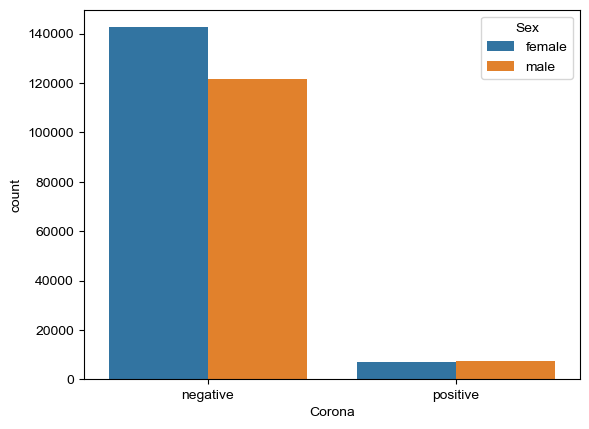

In [42]:
sns.countplot(df, hue = 'Sex', x = df['Corona'])
sns.set(style='whitegrid')

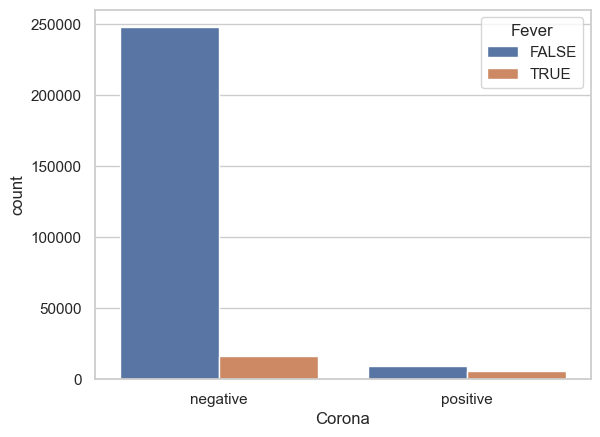

In [43]:
sns.countplot(df, x = df['Corona'],hue='Fever')
sns.set(style='whitegrid')

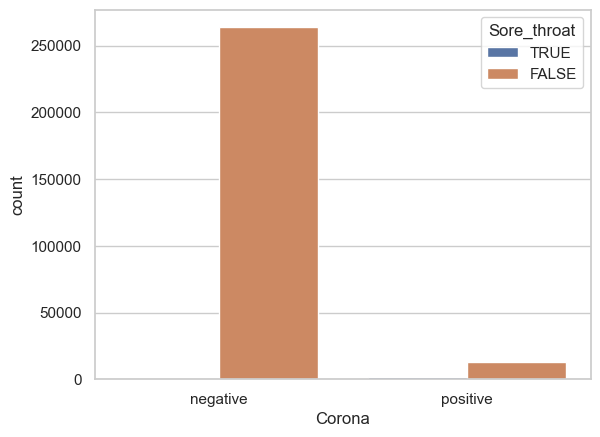

In [44]:
sns.countplot(df, x = df['Corona'],hue='Sore_throat')
sns.set(style='whitegrid')

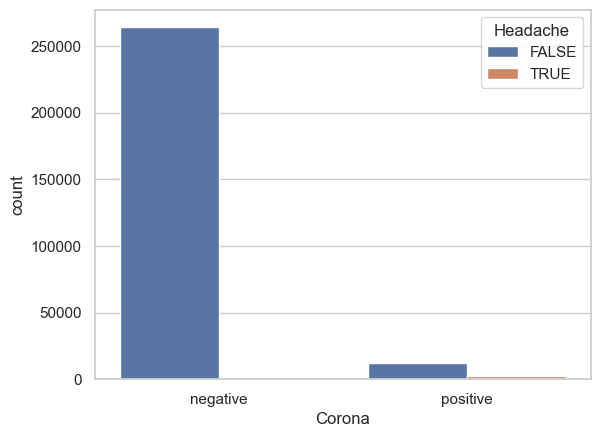

In [45]:
sns.countplot(df, x = df['Corona'],hue='Headache')
sns.set(style='whitegrid')

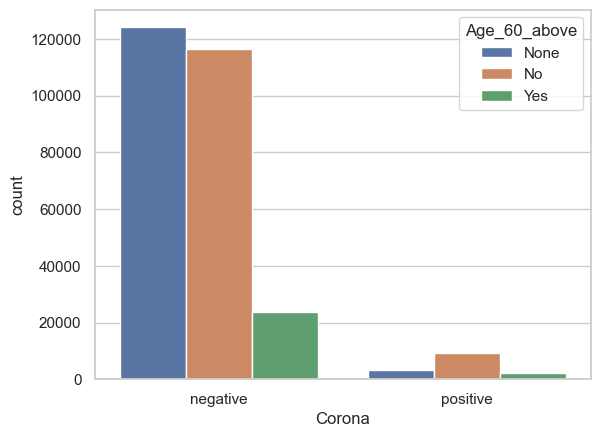

In [46]:
sns.countplot(df, x = df['Corona'],hue='Age_60_above')
sns.set(style='whitegrid')

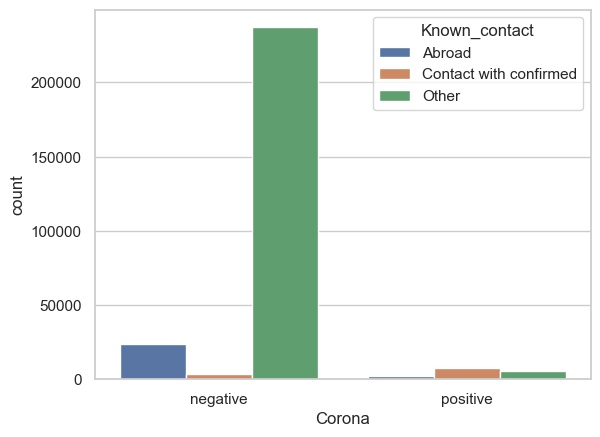

In [47]:
sns.countplot(df, x = df['Corona'],hue='Known_contact')
sns.set(style='whitegrid')

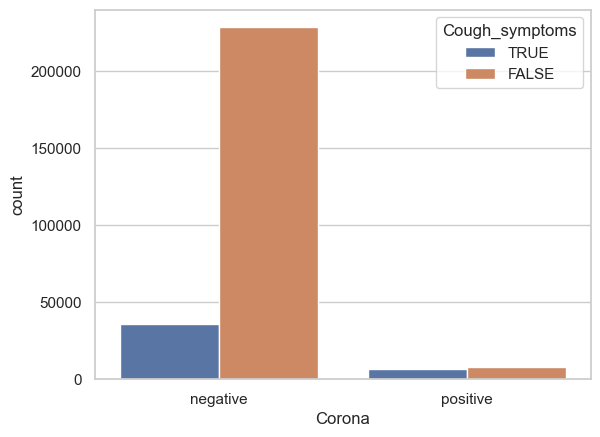

In [48]:
sns.countplot(df, x = df['Corona'],hue='Cough_symptoms')
sns.set(style='whitegrid')

#### conclusion

1. the number of people who got Covid test report as negitve is      higher than the number of people who got Covid test report as positve

2. the sum of positively reported male people number is higher than female

3. The number of negtively reported people who got fever is lesser than the number of negtively reported people who did not get fever. And the people who got fever or not are postively reported for Covid-19 is almost equal in number. So that, fever is not considerable symptom actually in case of covid.

4. the number of positvely reported people who got sore_troat is very less as compared to the number of positvely reported people who did not get sore_troat and the number of negtively reported people who did not sore_troat. So that, sore_troat is also not considerable symptom for Covid-19.

5. the reporting of symptom headache is similar to sore_troat,

6. the reporting of Age_60_above is similar to sore_troat

7. the one known_contact who got confirmed for positively reported people is heigher than other, so that feture known_contract with comformed persons is considerable

8. the number of postively reported people who has symptom cough or not is alomost equal and other hand the number of negtively reported people who got cough is heigher than the number of positively reported people 

these symptoms are not acceptable to predict Covid-19 except the Cough symptom and Age_above_60 and contact are not very relavent to the prediction 

### Applying label encoding 


In [50]:
from sklearn.preprocessing import LabelEncoder

In [59]:
custom_mappings = {
    'Cough_symptoms': {'TRUE': 1, 'FALSE': 0},
    'Fever': {'TRUE': 1, 'FALSE': 0,},
    'Sore_throat': {'TRUE': 1, 'FALSE': 0,},
    'Shortness_of_breath': {'TRUE': 1, 'FALSE': 0,},
    'Headache': {'TRUE': 1, 'FALSE': 0,},
    'Corona': {'negative': 0, 'positive': 1,},
    'Sex': {'male': 1, 'female': 2},
    'Age_60_above': {'None': 2, 'No': 0, 'Yes': 1},
    'Known_contact': {'Abroad': 1, 'Contact with confirmed': 2, 'Other': 3, 'None': 4}

}

In [64]:
df.replace(custom_mappings, inplace=True)
df

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,0,1,0,0,0,-1,2,1
1,0,1,0,0,0,1,-1,2,1
2,0,1,0,0,0,1,-1,2,1
3,1,0,0,0,0,0,-1,2,1
4,1,0,0,0,0,0,-1,2,2
...,...,...,...,...,...,...,...,...,...
278843,0,0,0,0,0,1,-1,1,3
278844,0,0,0,0,0,0,-1,2,3
278845,0,0,0,0,0,0,-1,1,3
278846,0,0,0,0,0,0,-1,1,3


In [54]:
#droping out the non relevent column
df.drop(columns=['Ind_ID'], inplace=True)

In [55]:
df.drop(columns=['Test_date'], inplace=True)

## Feature Selection chi-square Test

In [69]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df[['Cough_symptoms','Fever','Sore_throat','Shortness_of_breath','Headache','Sex','Known_contact']],
                                              df['Corona'],test_size=0.2,random_state=42)

In [70]:
X_train.head()

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Sex,Known_contact
267278,0,0,0,0,0,1,3
144659,0,0,0,0,0,2,3
109640,0,0,0,0,0,1,3
172733,1,0,0,0,0,2,3
54864,0,0,0,0,0,1,2


In [71]:
## Perform chi2 test
### chi2 returns 2 values
### Fscore and the pvalue
from sklearn.feature_selection import chi2
f_p_values=chi2(X_train,y_train)

In [72]:
f_p_values

(array([7.14996333e+03, 1.41111438e+04, 1.69284494e+04, 1.19606257e+04,
        2.97234514e+04, 1.88498724e+01, 1.28836565e+03]),
 array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 1.41420558e-005, 3.81538285e-282]))

In [73]:
import pandas as pd
p_values=pd.Series(f_p_values[1])
p_values.index=X_train.columns
p_values

Cough_symptoms          0.000000e+00
Fever                   0.000000e+00
Sore_throat             0.000000e+00
Shortness_of_breath     0.000000e+00
Headache                0.000000e+00
Sex                     1.414206e-05
Known_contact          3.815383e-282
dtype: float64

In [75]:
##  we can see that known contact , and age_above_60 are not that much related so we can drop them

In [78]:
df.drop(columns=['Age_60_above'], inplace=True)

In [80]:
df.head()

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Sex
0,1,0,1,0,0,0,2
1,0,1,0,0,0,1,2
2,0,1,0,0,0,1,2
3,1,0,0,0,0,0,2
4,1,0,0,0,0,0,2


In [ ]:
# Save the DataFrame to a CSV file
df.to_csv('output_file.csv', index=False)

# Model training

### Hypothesis - Decision tree can predict more accurate than Random forest

In [81]:
#load dataset in new csv file
df2=pd.read_csv(r"C:\Users\star\Desktop\project corona\output_file.csv")

In [84]:
df2.corr()

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Sex
Cough_symptoms,1.000000,0.454386,0.115637,0.106749,0.116350,0.194711,-0.032870
Fever,0.454386,1.000000,0.122832,0.126070,0.168841,0.263649,-0.033126
Sore_throat,0.115637,0.122832,1.000000,0.197540,0.323132,0.275718,0.016923
Shortness_of_breath,0.106749,0.126070,0.197540,1.000000,0.202538,0.231057,0.014124
Headache,0.116350,0.168841,0.323132,0.202538,1.000000,0.364739,0.002551
Corona,0.194711,0.263649,0.275718,0.231057,0.364739,1.000000,-0.022456
Sex,-0.032870,-0.033126,0.016923,0.014124,0.002551,-0.022456,1.000000


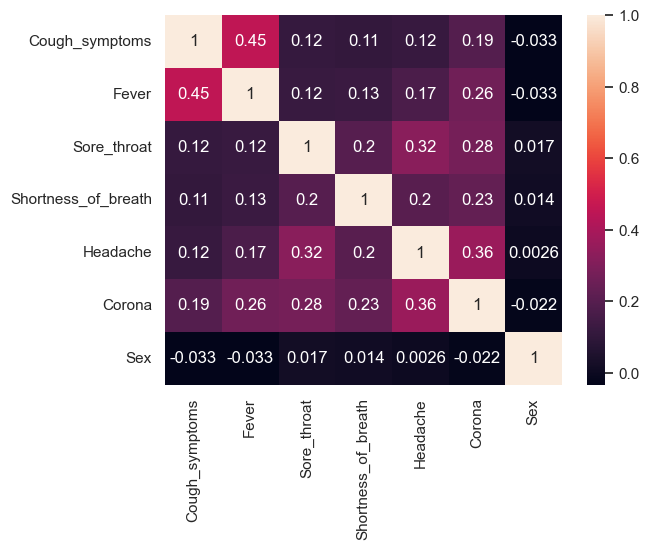

In [85]:
sns.heatmap(df2.corr(),annot=True);

In [96]:
##Logistic Regression

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [92]:
# Select relevant columns for predictor variables (X) and target variable (y)
X = df2[['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache', 'Sex',]]
y = df2['Corona']

In [93]:
model = LogisticRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

In [94]:
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)
confusion_matrix_output = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:\n', classification_report_output)
print('Confusion Matrix:\n', confusion_matrix_output)

Accuracy: 0.9567868029406491
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98     52832
           1       0.84      0.22      0.35      2938

    accuracy                           0.96     55770
   macro avg       0.90      0.61      0.67     55770
weighted avg       0.95      0.96      0.94     55770

Confusion Matrix:
 [[52704   128]
 [ 2282   656]]


In [97]:
## Dicision tree 
df3=df2.copy()

In [98]:
from sklearn.tree import DecisionTreeClassifier # Importing Decision Tree Classifier
from sklearn.model_selection import train_test_split # Importing train_test_split function
from sklearn import metrics #Importing scikit-learn metrics module for accuracy calculation
from sklearn import tree

In [99]:
df_copy = df.copy()

In [100]:
X = df_copy.drop('Corona', axis=1)  # Features (all columns except 'Corona')
y = df_copy['Corona']  # Target variable ('Corona')

# Display the first few rows of features (X) and target variable (y)
print("Features (X):")
print(X.head())

print("\nTarget variable (y):")
print(y.head())

Features (X):
   Cough_symptoms  Fever  Sore_throat  Shortness_of_breath  Headache  Sex
0               1      0            1                    0         0    2
1               0      1            0                    0         0    2
2               0      1            0                    0         0    2
3               1      0            0                    0         0    2
4               1      0            0                    0         0    2

Target variable (y):
0    0
1    1
2    1
3    0
4    0
Name: Corona, dtype: int64


In [101]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42) # 75% training and 25% test

In [102]:
# Create Decision Tree classifer object
classification = DecisionTreeClassifier()

# Train Decision Tree Classifer
classification = classification.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = classification.predict(X_test)

In [103]:
print(f"Decision tree training set accuracy: {format(classification.score(X_train, y_train), '.4f')} ")
print(f"Decision tree testing set accuracy: {format(classification.score(X_test, y_test), '.4f')} ")

Decision tree training set accuracy: 0.9580 
Decision tree testing set accuracy: 0.9575 


In [104]:
# Model Accuracy, how often is the classifier correct?
# print classification report apply confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     52832
           1       0.84      0.24      0.37      2938

    accuracy                           0.96     55770
   macro avg       0.90      0.62      0.67     55770
weighted avg       0.95      0.96      0.95     55770



In [105]:
##after applying confusion_matrix the precision increases

In [106]:
## Random Forest
print("Features (X):")
print(X.head())

print("\nTarget variable (y):")
print(y.head())

Features (X):
   Cough_symptoms  Fever  Sore_throat  Shortness_of_breath  Headache  Sex
0               1      0            1                    0         0    2
1               0      1            0                    0         0    2
2               0      1            0                    0         0    2
3               1      0            0                    0         0    2
4               1      0            0                    0         0    2

Target variable (y):
0    0
1    1
2    1
3    0
4    0
Name: Corona, dtype: int64


In [107]:
#feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_X= StandardScaler()    
X_train= st_X.fit_transform(X_train)    
X_test= st_X.transform(X_test)   

In [108]:
#Fitting Decision Tree classifier to the training set  
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier.fit(X_train, y_train) 
#In the above code, the classifier object takes below parameters:

#n_estimators= The required number of trees in the Random Forest. The default value is 10. We can choose any number but need to take care of the overfitting issue.

#criterion= It is a function to analyze the accuracy of the split. Here we have taken "entropy" for the information gain.

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [109]:
#Predicting the test set result  
y_pred= classifier.predict(X_test)  

In [110]:
# Output
print(y_pred)

[0 0 0 ... 0 0 0]


In [111]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  

In [112]:
cm


array([[52703,   129],
       [ 2239,   699]], dtype=int64)

In [114]:
from sklearn.metrics import accuracy_score, precision_score, recall_score


In [115]:
model = RandomForestClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)  # Specify the positive label
recall = recall_score(y_test, y_pred)

# Display the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Accuracy: 0.9575
Precision: 0.8442
Recall: 0.2379


In [116]:
## KNN_Validation
print("Features (X):")
print(X.head())

print("\nTarget variable (y):")
print(y.head())

Features (X):
   Cough_symptoms  Fever  Sore_throat  Shortness_of_breath  Headache  Sex
0               1      0            1                    0         0    2
1               0      1            0                    0         0    2
2               0      1            0                    0         0    2
3               1      0            0                    0         0    2
4               1      0            0                    0         0    2

Target variable (y):
0    0
1    1
2    1
3    0
4    0
Name: Corona, dtype: int64


In [117]:
#feature scaling
from sklearn.preprocessing import StandardScaler    
scaler=StandardScaler()
scaler

### using fit_transform to Standardize the train data
X_train=scaler.fit_transform(X_train)
X_train

X_test=scaler.transform(X_test)
X_test

array([[-0.42238042, -0.2904043 , -0.08383722, -0.07527769, -0.09388216,
         0.92773324],
       [-0.42238042, -0.2904043 , -0.08383722, -0.07527769, -0.09388216,
         0.92773324],
       [-0.42238042, -0.2904043 , -0.08383722, -0.07527769, -0.09388216,
        -1.07789606],
       ...,
       [-0.42238042, -0.2904043 , -0.08383722, -0.07527769, -0.09388216,
         0.92773324],
       [-0.42238042, -0.2904043 , -0.08383722, -0.07527769, -0.09388216,
         0.92773324],
       [-0.42238042, -0.2904043 , -0.08383722, -0.07527769, -0.09388216,
         0.92773324]])

In [118]:
#Now we will fit the K-NN classifier to the training data. To do this we will import the KNeighborsClassifier class of Sklearn Neighbors library. After importing the class, we will create the Classifier object of the class.
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)  
classifier.fit(X_train, y_train) 

KNeighborsClassifier()

In [119]:
#Predicting the test set result  
y_pred= classifier.predict(X_test)

In [120]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [121]:
#Creating the Confusion matrix  , accuracy score and classification report.
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [122]:
cm= confusion_matrix(y_test, y_pred) 
print(cm)
score=accuracy_score(y_test, y_pred)
print(score)

[[52727   105]
 [ 2280   658]]
0.957235072619688


# Cross validation

Cross-validation is a technique used in machine learning to evaluate the performance of a predictive model on a given dataset. The basic idea behind cross-validation is to split the data into two sets: a training set, used to train the model, and a validation set, used to evaluate the performance of the model.

The most common type of cross-validation is k-fold cross-validation. In k-fold cross-validation, the data is divided into k equal-sized "folds." The model is then trained on k-1 folds, and the remaining fold is used for validation. This process is repeated k times, with each fold used once for validation. The results of each fold are then averaged to give an overall estimate of the model's performance.

In [123]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

In [124]:
#Implementing cross validation 
k = 5
kf = KFold(n_splits=k, random_state=None)
model = KNeighborsClassifier()
acc_score = []


In [125]:
for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
     
    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)
     
    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/k
 
print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))

accuracy of each fold - [0.9355746817285279, 0.9327954097184866, 0.9493813878429262, 0.9738026502178629, 0.9649626136384013]
Avg accuracy : 0.9513033486292409


## cross validation

In [127]:
from xgboost import XGBClassifier, plot_tree
import xgboost as xgb
from sklearn.metrics import mean_squared_error
plt.style.use('ggplot')


In [128]:
# Initialize XGBoost classifier
model = XGBClassifier()


In [15]:
# Train the model
model.fit(X_train, y_train)

NameError: name 'model' is not defined

In [130]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [131]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)  # Specify the positive label
recall = recall_score(y_test, y_pred)

# Display the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Accuracy: 0.9796
Precision: 0.1538
Recall: 0.0018


In [10]:
pip install gradio

In [9]:
import gradio as gr


In [10]:
from sklearn.tree import DecisionTreeClassifier


Traceback (most recent call last):
  File "C:\Users\star\anaconda3\Lib\site-packages\gradio\queueing.py", line 456, in call_prediction
    output = await route_utils.call_process_api(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\star\anaconda3\Lib\site-packages\gradio\route_utils.py", line 232, in call_process_api
    output = await app.get_blocks().process_api(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\star\anaconda3\Lib\site-packages\gradio\blocks.py", line 1522, in process_api
    result = await self.call_function(
             ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\star\anaconda3\Lib\site-packages\gradio\blocks.py", line 1144, in call_function
    prediction = await anyio.to_thread.run_sync(
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\star\anaconda3\Lib\site-packages\anyio\to_thread.py", line 33, in run_sync
    return await get_asynclib().run_sync_in_worker_thread(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

Traceback (most recent call last):
  File "C:\Users\star\anaconda3\Lib\site-packages\gradio\queueing.py", line 456, in call_prediction
    output = await route_utils.call_process_api(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\star\anaconda3\Lib\site-packages\gradio\route_utils.py", line 232, in call_process_api
    output = await app.get_blocks().process_api(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\star\anaconda3\Lib\site-packages\gradio\blocks.py", line 1522, in process_api
    result = await self.call_function(
             ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\star\anaconda3\Lib\site-packages\gradio\blocks.py", line 1144, in call_function
    prediction = await anyio.to_thread.run_sync(
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\star\anaconda3\Lib\site-packages\anyio\to_thread.py", line 33, in run_sync
    return await get_asynclib().run_sync_in_worker_thread(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

In [16]:
df3 = pd.read_csv(r"C:\Users\star\Desktop\project corona\output_file.csv")

In [18]:
X = df3[['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache', 'Sex']]
y = df3['Corona']

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [20]:
dt_model = DecisionTreeClassifier()

# Train the model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [1]:
import duckdb

In [13]:
import gradio as gr
def predict_corona(Cough_symptoms, Fever, Sore_throat, Shortness_of_breath, Headache, Sex):
    # Convert input values to float
    Cough_symptoms , Fever, Sore_throat, Shortness_of_breath, Headache, Sex = float(cough), float(fever), float(sore_throat), float(shortness_of_breath), float(headache), float(sex)
    
    # Make a prediction using the Decision Tree model
    prediction = dt_model.predict([[Cough_symptoms, fever, Sore_throat, Shortness_of_breath, Headache, Sex]])[0]
    
    return f"Predicted Corona Status: {prediction}"

# Create a Gradio interface
iface = gr.Interface(
    fn=predict_corona,
    inputs=["text", "text", "text", "text", "text", "text"],
    outputs="text",
    title="Corona Prediction Model",
    description="Enter the symptoms and sex to predict the Corona status",
)

# Launch the Gradio interface
iface.launch()

Running on local URL:  http://127.0.0.1:7865

To create a public link, set `share=True` in `launch()`.


Traceback (most recent call last):
  File "C:\Users\star\anaconda3\Lib\site-packages\gradio\queueing.py", line 456, in call_prediction
    output = await route_utils.call_process_api(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\star\anaconda3\Lib\site-packages\gradio\route_utils.py", line 232, in call_process_api
    output = await app.get_blocks().process_api(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\star\anaconda3\Lib\site-packages\gradio\blocks.py", line 1522, in process_api
    result = await self.call_function(
             ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\star\anaconda3\Lib\site-packages\gradio\blocks.py", line 1144, in call_function
    prediction = await anyio.to_thread.run_sync(
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\star\anaconda3\Lib\site-packages\anyio\to_thread.py", line 33, in run_sync
    return await get_asynclib().run_sync_in_worker_thread(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

In [18]:
df5=pd.read_csv(r"C:\Users\star\Desktop\project corona\corona_ test.csv")

In [9]:
conn=duckdb.connect()
conn.register('df5',df5)

In [20]:
# Write an SQL query to find the number of patients who faced shortness of breath
query = '''
SELECT COUNT(*) AS num_patients_short_of_breath
FROM df5
WHERE Shortness_of_breath = 'TRUE'
'''

# Execute the query and fetch the result
result = conn.execute(query).fetchall()

# Print the result
print(result)

[(1577,)]


In [21]:
# Write an SQL query to find the number of negative patients with fever and sore throat
query = '''
SELECT COUNT(*) AS num_negative_patients
FROM df5
WHERE Corona = 'negative' AND fever = 'TRUE' AND Sore_throat = 'TRUE'
'''

# Execute the query and fetch the result
result = conn.execute(query).fetchall()

# Print the result
print(result)

[(142,)]


In [ ]:
# Write an SQL query to group by month and rank the number of positive cases
query = '''
SELECT
    MONTH(Test_date) AS Month,
    COUNT(*) AS TotalCases,
    RANK() OVER (ORDER BY COUNT(*) DESC) AS PositiveCasesRank
FROM df2
WHERE Corona = 'positive'
GROUP BY Month
ORDER BY Month;

'''
result = conn.execute(query).fetchall()
print(result)

In [22]:
# Write an SQL query to find female negative patients with cough and headache
query = '''
SELECT COUNT(*) AS num_female_negative_patients
FROM df5
WHERE Sex = 'female'
  AND Corona = 'negative'
  AND Cough_symptoms = 'TRUE'
  AND Headache = 'TRUE';
'''

# Execute the query and fetch the result
result = conn.execute(query).fetchall()
print(result)

[(69,)]


In [23]:
#How many elderly corona patients have faced breathing problems?
query = '''
SELECT COUNT(*) AS num_elderly_patients_with_breathing_problems
FROM df5
WHERE Age_60_above = 'Yes'
  AND Corona = 'positive'
  AND Shortness_of_breath = 'TRUE';
'''
result = conn.execute(query).fetchall()
print(result)

[(263,)]


In [26]:
#Which symptom was less common among COVID negative people?
query = '''
SELECT COUNT(*) AS TotalCount
FROM df5
WHERE
    Corona = 'negative'
    AND (Cough_symptoms = TRUE OR Fever =TRUE OR Sore_throat = TRUE  OR Shortness_of_breath = TRUE  OR Headache = TRUE );
'''

result = conn.execute(query).fetchall()
print(result)


[(40139,)]


In [ ]:
#Which three symptoms were more common among COVID positive patients?  write queary
query = '''
SELECT Cough_symptoms, Fever, Sore_throat, Shortness_of_breath, Headache
FROM df5 
WHERE Corona = 'positive';
'''
result = conn.execute(query).fetchall()
print(result)

In [ ]:
## What are the most common symptoms among COVID positive males whose known contact was abroad?
query = '''
SELECT
    Cough_symptoms,
    Fever,
    Sore_throat,
    Shortness_of_breath,
    Headache
FROM df5
WHERE
    Corona = 'positive'
    AND Sex = 'male'
    AND Known_contact = 'Abroad';
'''
result = conn.execute(query).fetchall()
print(result)